# Pymaceuticals Inc.
---

### Analysis

- From the summary stats, mice treated with the drug of interest, Capomulin, along with Ramicane, have the lowest mean tumor volumes at the end of their testing periods of 45 days. These regimens show roughly 20-25% lower tumor volumes than the other drug regimens, the worst performing of which were, on average, were Ketapril and Naftisol. Capomulin and Ramicane also display less variance in tumor volumes, indicating that the results from the treatment are more reliable and consistent. 

- A randomly selected mouse treated with Capomulin, u364, for instance, had a significant decrease in tumor volume by timepoint 45--from 45 mm3 at timepoint 0 to 31.02 mm3 by timepoint 45--though it may be worth noting that the  number of metastatic sitesstill  increased from 0 to 3 over the course of the treatmentns.

In [2]:
#pip install ipykernel
# I ended up running python.exe -m pip install --upgrade pip in Command Prompt

In [3]:
#pip install scipy (again, switched to using Command Prompt)
#to clear next cell's 'no module named scipy.stats' error

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results --- specified usecols this time around to avoid Nan error
mouse_metadata = pd.read_csv(mouse_metadata_path, usecols=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])  
study_results = pd.read_csv(study_results_path, usecols=['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])

In [5]:
# Combine the data into a single DataFrame
ALLmouseDF = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
ALLmouseDF.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [6]:
# Checking the number of mice.
mouseCOUNT = len(ALLmouseDF["Mouse ID"].unique())
mouseCOUNT

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DUPEmouse = ALLmouseDF[ALLmouseDF[['Mouse ID', 'Timepoint']].duplicated()]
DUPEmouse

# Optional: Get all the data for the duplicate mouse ID. --- I tried to do this in 1 step insted of 2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouseDF = ALLmouseDF.loc[ALLmouseDF["Mouse ID"] != "g989"]

In [9]:
# Checking the number of mice in the clean DataFrame.
newMOUSEcount = len(cleaned_mouseDF['Mouse ID'].unique())
newMOUSEcount

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tv = cleaned_mouseDF.groupby(["Drug Regimen"])

tumor_MEAN = tv["Tumor Volume (mm3)"].mean()
tumor_MEDIAN = tv["Tumor Volume (mm3)"].median()
tumor_VARIANCE = tv["Tumor Volume (mm3)"].var()
tumor_STD = tv["Tumor Volume (mm3)"].std()
tumor_SEM = tv["Tumor Volume (mm3)"].sem()

tumorsDF = pd.DataFrame({"MEAN": tumor_MEAN,
                        "MEDIAN": tumor_MEDIAN,
                        "VARIANCE": tumor_VARIANCE,
                        "STANDARD DEVIATION": tumor_STD,
                        "STANDARD ERROR OF MEAN": tumor_SEM})
                        
tumorsDF

,MEAN,MEDIAN,VARIANCE,STANDARD DEVIATION,STANDARD ERROR OF MEAN
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_1LINE = cleaned_mouseDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_1LINE.head(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


## Bar and Pie Charts

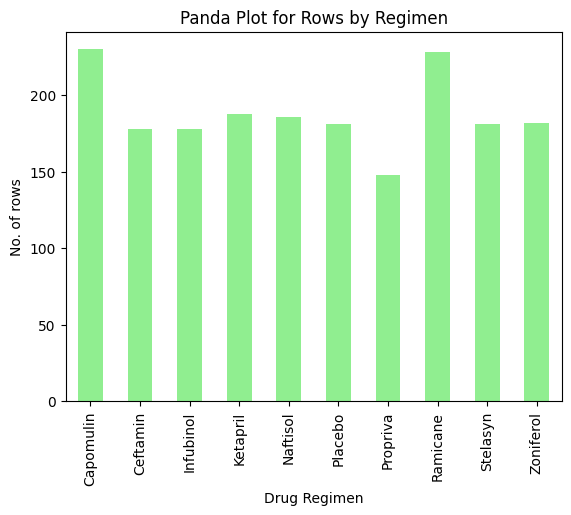

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_ROWS = cleaned_mouseDF.groupby("Drug Regimen")
regimen_ROWS = regimen_ROWS["Drug Regimen"].count()
regimen_ROWS.plot.bar(color = "lightgreen")

plt.xlabel("Drug Regimen")
plt.ylabel("No. of rows")
plt.title("Panda Plot for Rows by Regimen")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

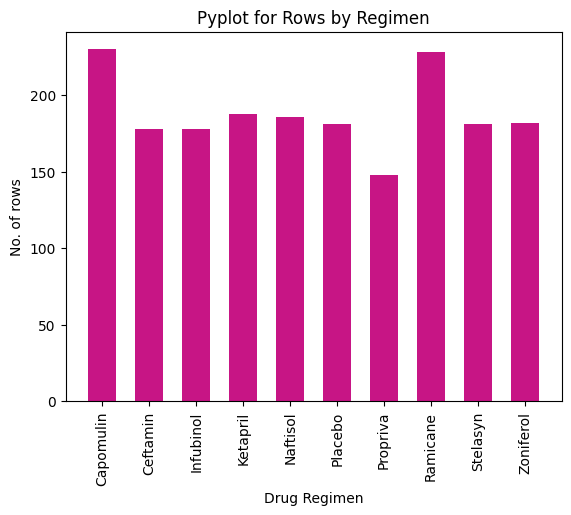

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# converted the DF to a dictionary 
list = regimen_ROWS.to_dict()
drugs = list.keys()
rows = list.values()

plt.bar(drugs, height = rows, width = 0.6, align = "center", color = "mediumvioletred");

plt.xlabel("Drug Regimen")
plt.ylabel("No. of rows")
plt.title("Pyplot for Rows by Regimen")

plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of Female vs Male mice using Pyplot')

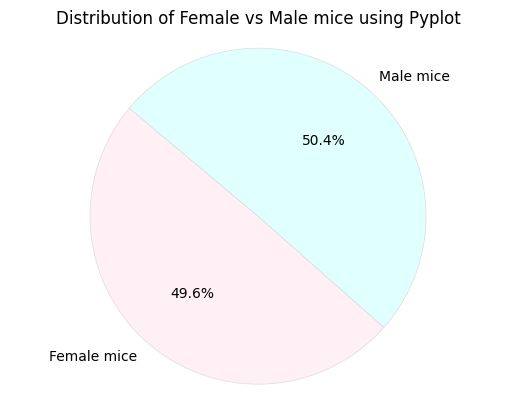

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
malemiceCOUNT = len(cleaned_mouseDF.loc[cleaned_mouseDF["Sex"] == "Male"]["Mouse ID"].unique())
femalemiceCOUNT = len(cleaned_mouseDF.loc[cleaned_mouseDF["Sex"] == "Female"]["Mouse ID"].unique())

malePERC = malemiceCOUNT/ newMOUSEcount
femalePERC = femalemiceCOUNT/ newMOUSEcount

labels = ["Female mice", "Male mice"]

# The values of each section of the pie chart
genders = [femalePERC, malePERC]

# The colors of each section of the pie chart
colors = ["lavenderblush", "lightcyan"]
         
plt.pie(genders, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140, wedgeprops = 
        {"edgecolor" : "gainsboro", 
        'linewidth': .5, 
        'antialiased': True}) 
plt.axis("equal")    
plt.title("Distribution of Female vs Male mice using Pyplot")

In [15]:
# Loaded variables into a DF via a dictionary
mouse_dict = [{"GENDER": "Male", "PERCENTAGE OF TOTAL MICE": malePERC},
             {"GENDER": "Female", "PERCENTAGE OF TOTAL MICE": femalePERC}]
pie_genderDF = pd.DataFrame(mouse_dict)
pie_genderDF

,GENDER,PERCENTAGE OF TOTAL MICE
0,Male,0.504032
1,Female,0.495968


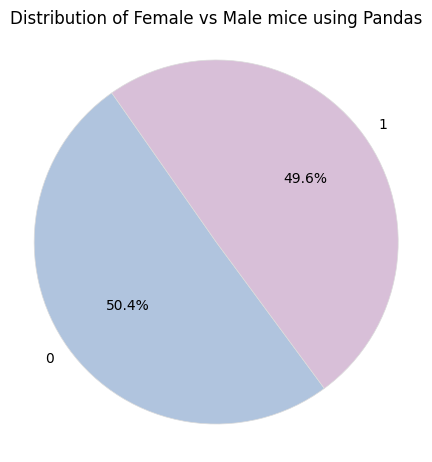

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["lightsteelblue", "thistle"]
plot = pie_genderDF.plot.pie(y='PERCENTAGE OF TOTAL MICE', autopct='%1.1f%%', legend=None, figsize=(4.5, 4.5), colors=colors, startangle=125, wedgeprops = 
        {"edgecolor" : "gainsboro", 
        'linewidth': .5, 
        'antialiased': True})

plt.axis('equal')
plt.tight_layout()
plt.ylabel('')
plt.title("Distribution of Female vs Male mice using Pandas")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

fourT_miceDF = cleaned_mouseDF.loc[(cleaned_mouseDF["Drug Regimen"] == "Capomulin") |
                                  (cleaned_mouseDF["Drug Regimen"] == "Ramicane") |
                                  (cleaned_mouseDF["Drug Regimen"] == "Infubinol") |
                                  (cleaned_mouseDF["Drug Regimen"] == "Ceftamin")]

last_times_fourT_miceDF = fourT_miceDF.groupby(["Mouse ID"])["Timepoint"].max()
last_times_fourT_miceDF = last_times_fourT_miceDF.reset_index()
last_times_fourT_miceDF.head(2)

,Mouse ID,Timepoint
0,a203,45
1,a251,45


In [18]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volDF = pd.merge(cleaned_mouseDF, last_times_fourT_miceDF, how="right", on=["Mouse ID", "Timepoint"])
final_volDF.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drugLIST = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
drugLIST

# Create empty list to fill with tumor vol data (for plotting)  #for EACH drug?
Capomulin_tumors = []
Ceftamin_tumors = []
Infubinol_tumors = []
Ramicane_tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_volDF.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        Capomulin_tumors.append(row['Tumor Volume (mm3)'])
        
    if row["Drug Regimen"] == 'Ceftamin':
        Ceftamin_tumors.append(row['Tumor Volume (mm3)'])
        
    if row["Drug Regimen"] == 'Infubinol':
        Infubinol_tumors.append(row['Tumor Volume (mm3)'])
        
    if row["Drug Regimen"] == 'Ramicane':
        Ramicane_tumors.append(row['Tumor Volume (mm3)'])

tumor_VOLS_DF = pd.DataFrame({"Capomulin": Capomulin_tumors,
                       "Ceftamin": Ceftamin_tumors,
                       "Infubinol": Infubinol_tumors,
                       "Ramicane": Ramicane_tumors
                       })
# add subset -- DF?
 
# Determine outliers using upper and lower bounds
tumor_VOLS_DF_MAX_outliers = tumor_VOLS_DF.max()
tumor_VOLS_DF_MIN_outliers = tumor_VOLS_DF.min()

IQR = st.iqr(tumor_VOLS_DF, interpolation = 'midpoint') 
print(IQR)

IQR_Capomulin = st.iqr(Infubinol_tumors, interpolation = 'midpoint')
print(IQR)

22.858730715000007
22.858730715000007


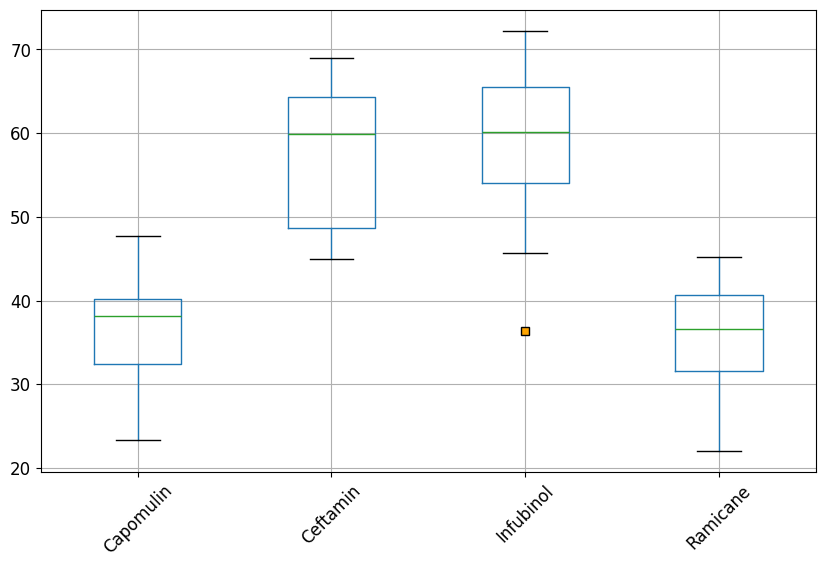

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots(figsize=(10, 6))

box = tumor_VOLS_DF.boxplot(grid=True, rot=45, fontsize=12, showfliers=True, flierprops=dict(markerfacecolor='orange', marker='s', label='not shown')
)

plt.show()

## Line and Scatter Plots

In [21]:
import numpy as np

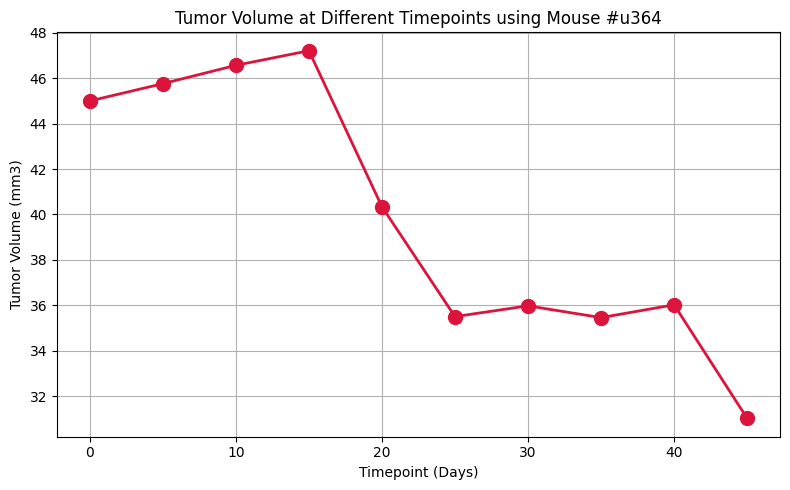

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
u364 = cleaned_mouseDF.loc[cleaned_mouseDF["Mouse ID"] == "u364"]

# Set x axis and variables
x_axis = u364["Timepoint"]
u364_tumorVOL = u364["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.title("Tumor Volume at Different Timepoints using Mouse #u364")
plt.plot(x_axis, u364_tumorVOL, markersize=10, marker="o", color="crimson", linewidth=2)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.tight_layout()
plt.show()

In [105]:
u364

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [102]:
capomulin_MICE = cleaned_mouseDF.loc[cleaned_mouseDF["Drug Regimen"] == "Capomulin"]
capomulin_MICE.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0


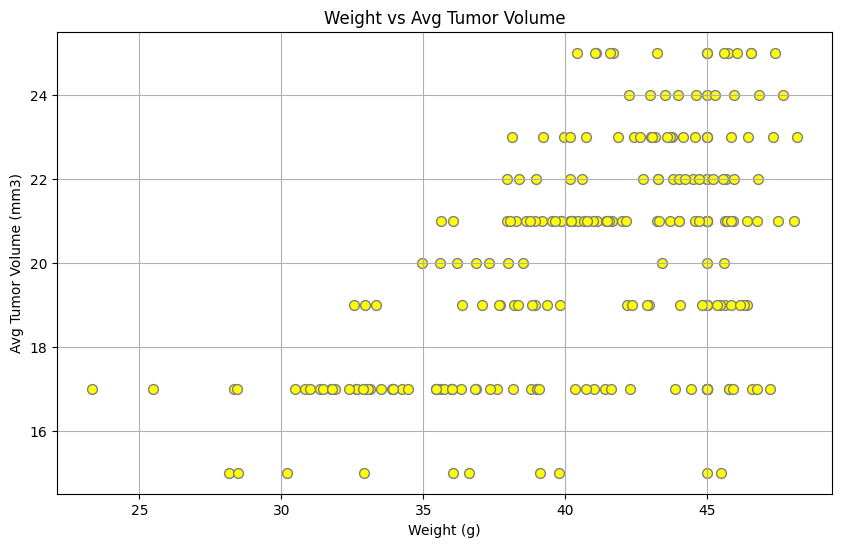

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_MICE = cleaned_mouseDF.loc[cleaned_mouseDF["Drug Regimen"] == "Capomulin"]
cap_mice_DF = capomulin_MICE.loc[:, ['Weight (g)', 'Tumor Volume (mm3)']]

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.grid()
plt.title("Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.scatter(cap_mice_DF["Tumor Volume (mm3)"], cap_mice_DF["Weight (g)"], s=50, color="yellow", edgecolor="gray", marker="o")
plt.show()

## Correlation and Regression

In [58]:
from scipy.stats import linregress

The correlation coefficient is: 0.5256995552077172


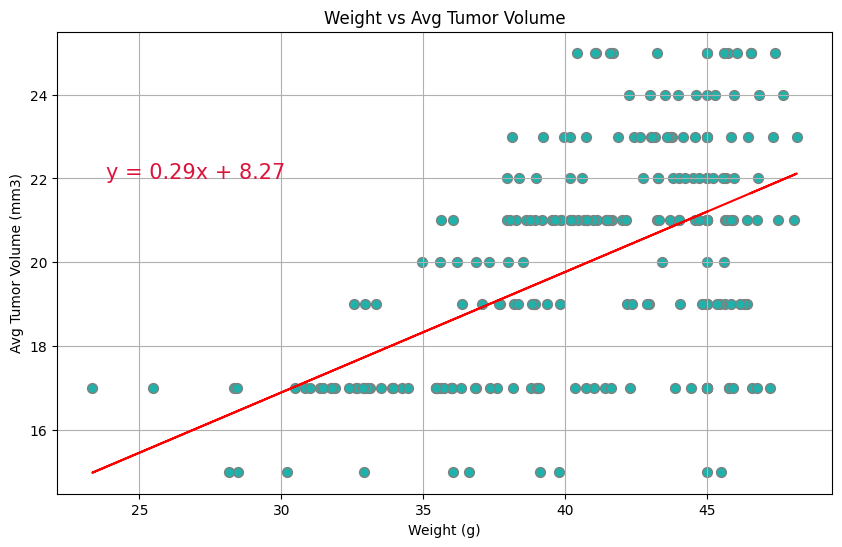

In [97]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Replotted the chart
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.grid()
plt.title("Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

#Added line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(27, 22), fontsize=15,color="crimson", ha= 'center')
plt.plot(x_values,regress_values,"r-")

#correlation coefficient:
print(f"The correlation coefficient is: {rvalue}")

plt.scatter(cap_mice_DF["Tumor Volume (mm3)"], cap_mice_DF["Weight (g)"], s=50, color="lightseagreen", edgecolor="gray", marker="o")
plt.show()